[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
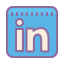
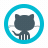

# <span style="color:skyblue">**FileSensor - Check File Availability**</span>

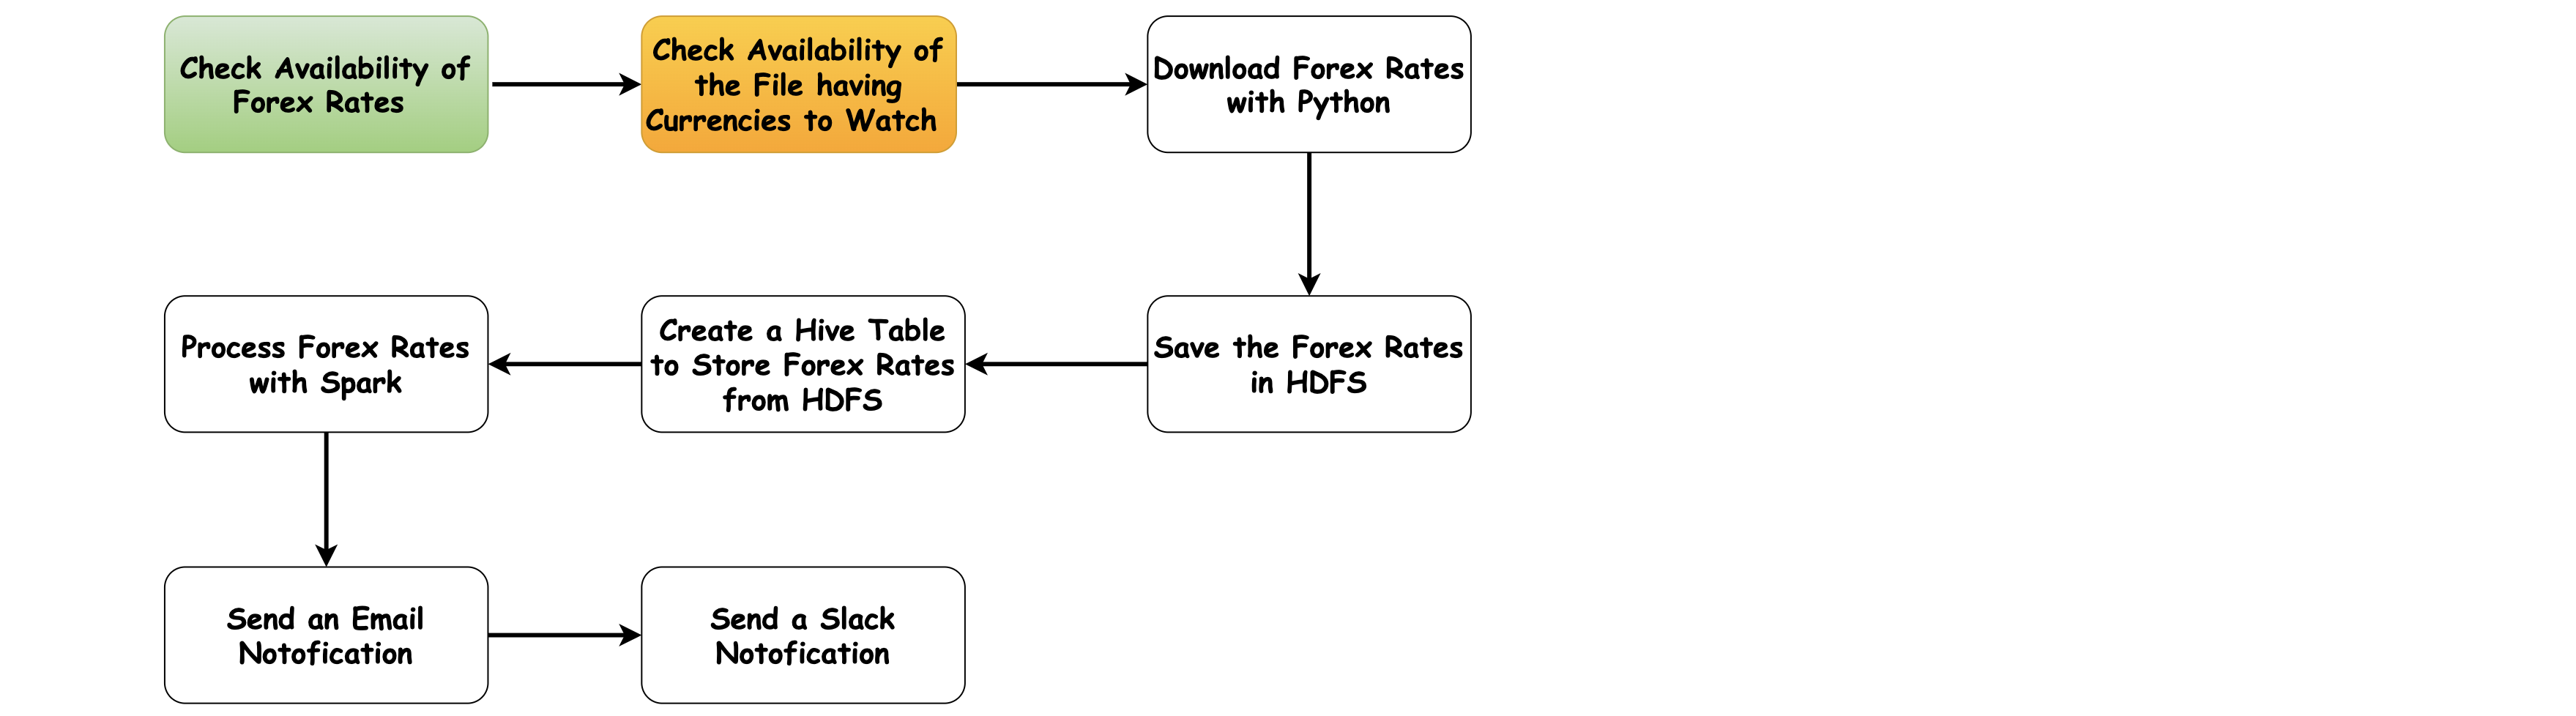

Second task in our data pipeline is to verify the availability of the file, which contains the currencies to watch.

In this case, We're going to use `FileSensor` that verifies if a file or folder exists at a specific location in our file system (file containing currencies to watch) every 60 seconds.

### <span style="color:orange">Import FileSensor</span>

`FileSensor` introduced by default with Airflow 2.0. It means, We don't need to have any additional provider in order to access this operator.

So here, We need to import `FileSensor` in our DAG file `forex_data_pipeline.py`

```python
from airflow.sensors.filesystem import FileSensor
```

### <span style="color:orange">Create Sensor Task</span>

We need to add a new variable to represent the task, that is `is_forex_currencies_file_available` here.

```python
is_forex_currencies_file_available = FileSensor(task_id = "is_forex_currencies_file_available",
                                                fs_conn_id = "forex_path",
                                                filepath = "forex_currencies.csv",
                                                poke_interval = 5,
                                                timeout = 20)
```

Here, We have created a task with the necessary parameters :

* **`task_id`** : An unique identifier commonly used for all the tasks / operators. Each operator must have a unique task ID within the DAG.

* **`fs_conn_id`** : Reference to the connection id, where the connection contains the path at which the file or folder should exist.  

* **`filepath`** : Name of the file or the folder that we are looking for.

* **`poke_interval`** : Common to all sensors. This corresponds as the frequency at which the sensor checks if the condition is met (in seconds).

* **`timeout`** : Common to all sensors. This corresponds as the maximum amount of time the sensor should run before timing out (in seconds). It is important to specify, if we don't want to keep our sensor running by default for 7 days.

### <span style="color:orange">Set Up the Connection</span>

To create the connection `forex_path`, We need Airflow up and running just like before.

Then, we will go to the Airflow UI.

To add a new connection, Again we need to click on `admin` --> `connections` --> `+` to add a new record.

Here, We need to specify :

* `conn ID` same as specified in the Dag which is `forex_path`

* `conn type` as `File (path)` as we're waiting for the file in the file system

* `Extra` specified as `{"path":"opt/airflow/dags/files"}`. Here, `Extra` is the path, where we will be looking for the files, at the file system in the docker container of airflow.

* Click on `save` to create the connection

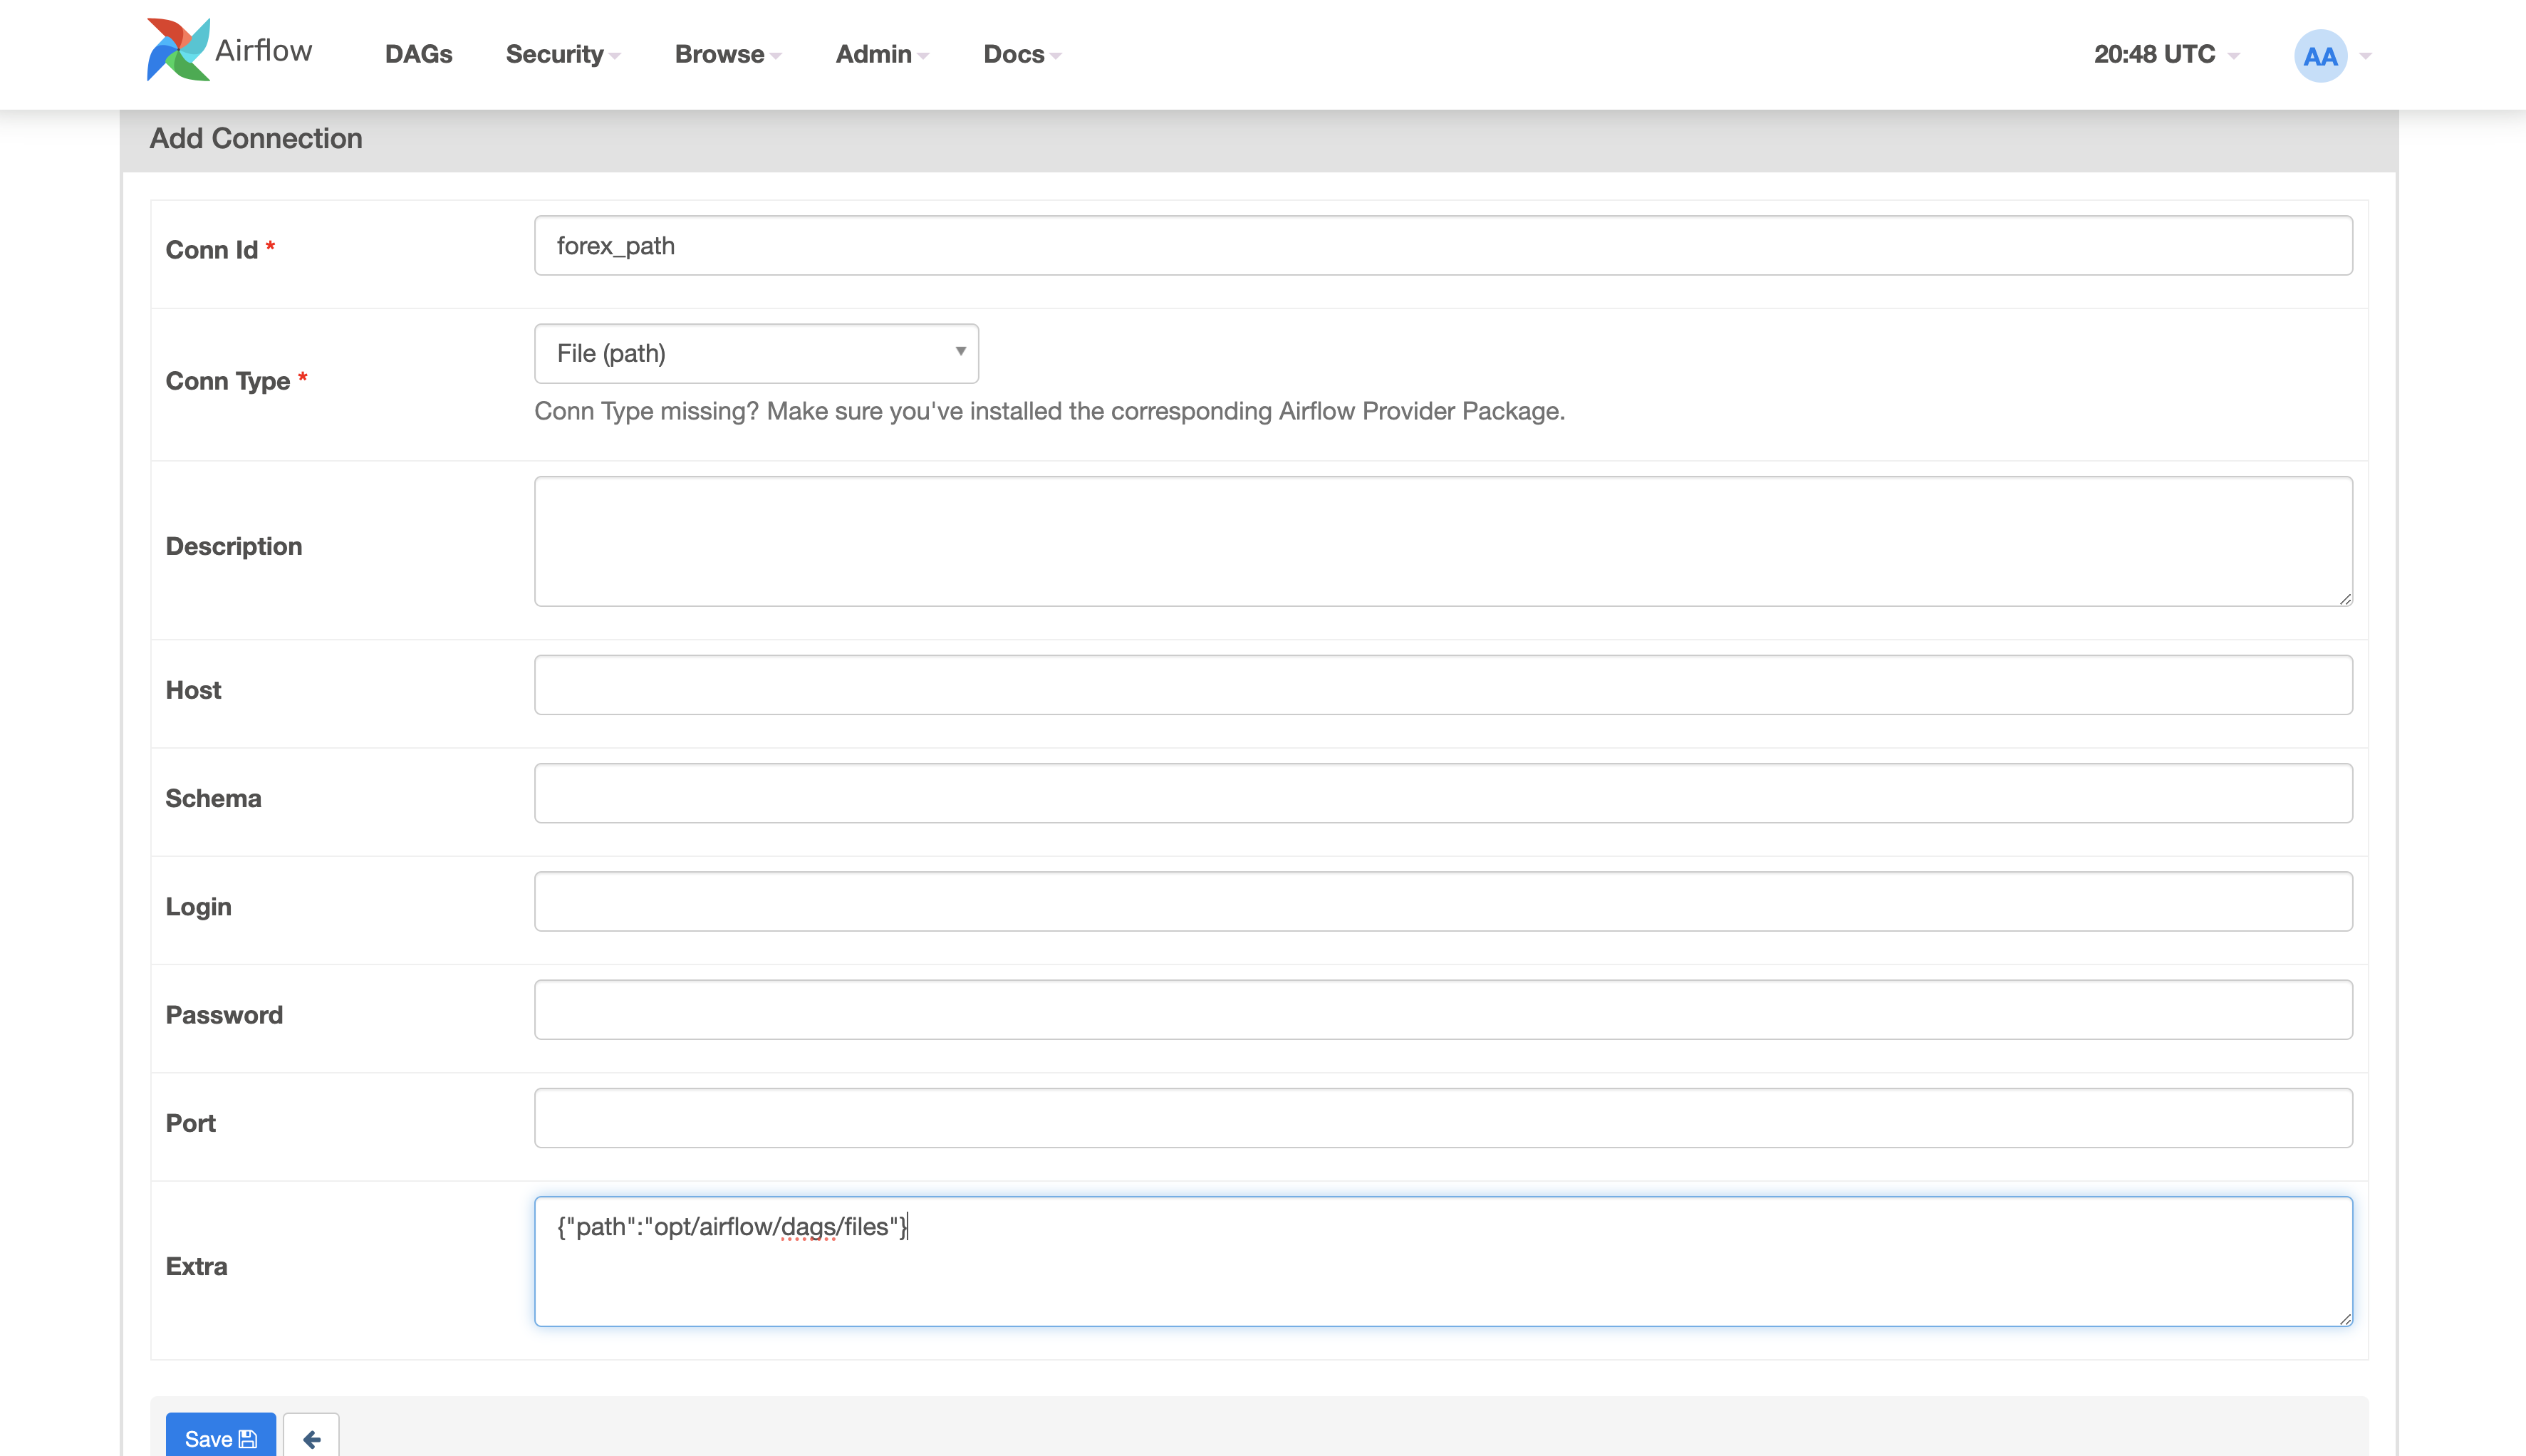

We have successfully added the connection to the `path`, where we will check the availability of the file.

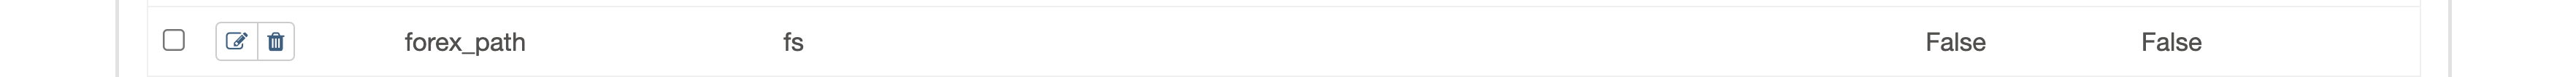

This connection will be used by `FileSensor` in our DAG, which will help in running our task and check if the file containing currencies is available at the mentioned path or not.

### <span style="color:orange">Explore File System in Docker Container Runnig Airflow</span>

Open a terminal in our code editor and run `docker ps` to list all running Docker containers.

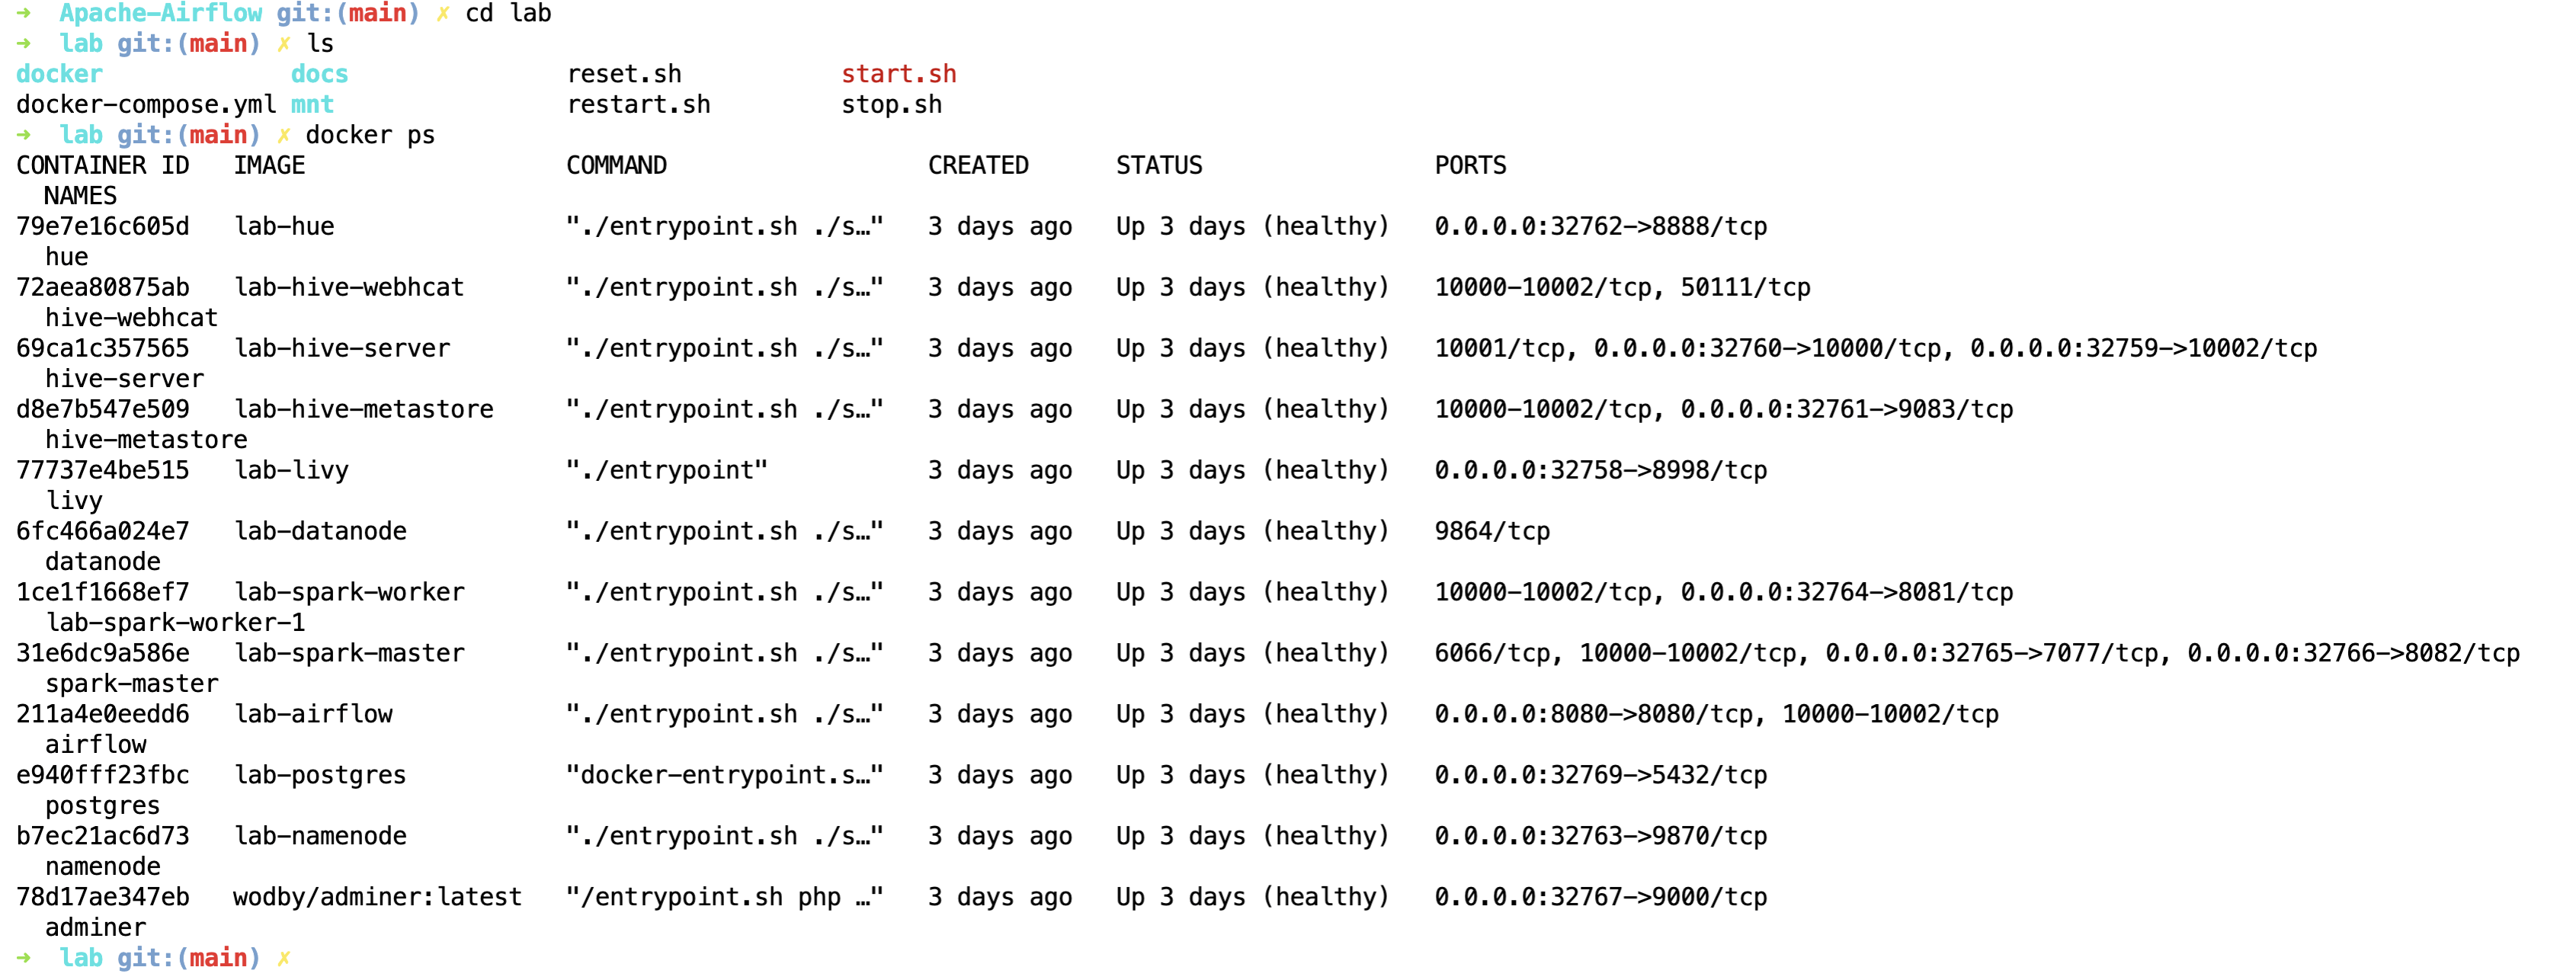

Next, Identify and Copy the container ID of Airflow, that is `211a4e0eedd6`

Now, Run `docker exec -it <container_id> /bin/bash` command to start an interactive bash session within the Airflow container. This command allows direct access to the file system within the container.

Now, Within the bash session, we can use the `ls` command to list the contents of the current directory.

Currently, We are at the `root`.

When we will change the directory to `/opt/airflow/dags/files` using the `cd` command, we can use `ls` again to confirm the presence of the desired file which is `forex_currencies.csv` here.

Here, `mnt/airflow/dags` folder in the file system of the host machine maps to the `opt/airflow/dags` folder within the Airflow container.

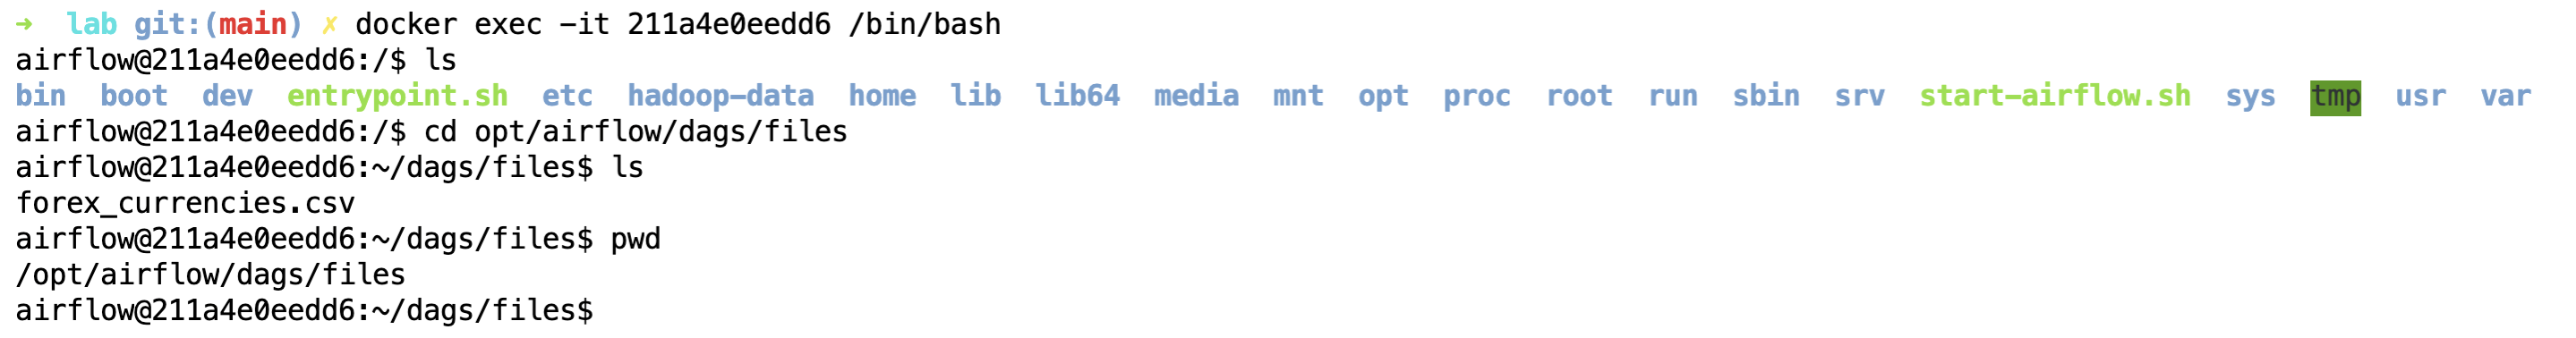

### <span style="color:orange">Test / Run Airflow Task</span>

With the airflow command line interface, We can test our tasks. It is the best practice to test the task before running, to check if it works or not.

First, Navigate to the root of the docker container running airflow.

Now, Run the command `airflow tasks test <DAG_ID> <TASK_ID> <EXECUTION_DATE_IN_THE_PAST>` inside the Airflow container's shell to test the task without storing any states in the metadata of airflow.

```shell
airflow tasks test forex_data_pipeline is_forex_currencies_file_available 2024-02-01
```

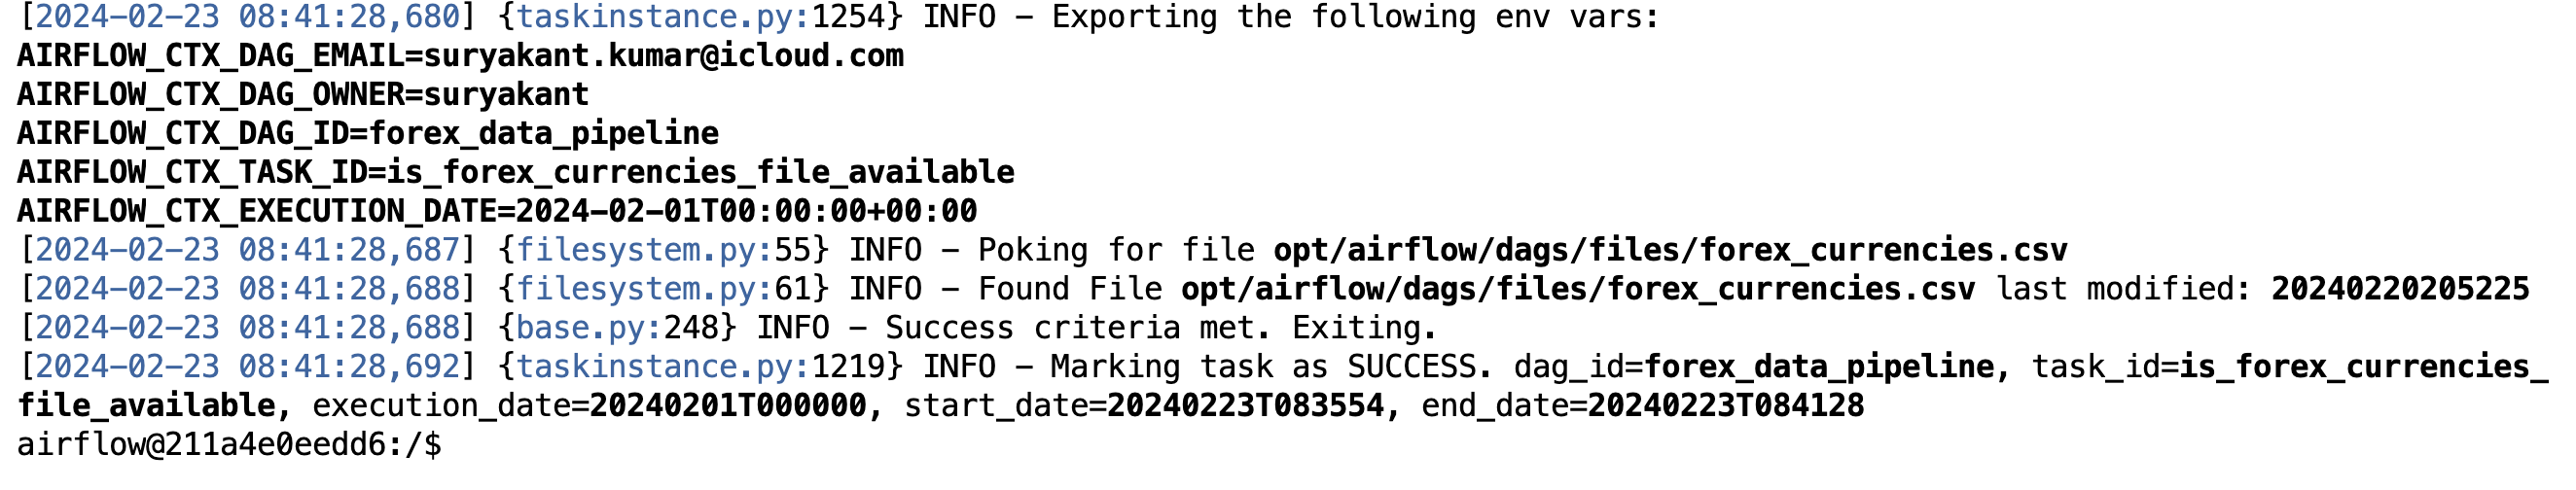

It is showing, the task execution was successful, by a message indicating `Success criteria met`.